In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE

In [2]:
dataframe = pd.read_csv('LaundryData_2021_T2.csv')
#showing our initial dataframe here
dataframe

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets
0,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,...,short_sleeve,black,short,clothes,3,10,no,2.912316,101.657948,1.0
1,19/10/2015,20:28:42,NaN,male,thin,32.0,no,no_kids,big,NaN,...,short_sleeve,blue_jeans,long,NaN,6,9,no,2.922506,101.643129,3.0
2,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,...,short_sleeve,black,long,NaN,4,10,no,2.935533,101.737170,1.0
3,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,...,short_sleeve,yellow,short,clothes,5,9,no,2.949924,101.637069,1.0
4,19/10/2015,21:40:28,indian,male,NaN,34.0,no,no_kids,big,blue,...,NaN,white,long,clothes,3,9,NaN,2.903530,101.661249,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2016-01-24,21:45:06,foreigner,male,moderate,30.0,yes,no_kids,small,yellow,...,short_sleeve,white,long,blankets,6,7,yes,3.082212,101.644878,2.0
3996,2015-12-26,01:48:15,malay,male,moderate,24.0,yes,baby,small,green,...,long sleeve,black,short,clothes,4,10,yes,3.118138,101.677315,3.0
3997,2015-12-07,01:42:32,foreigner,male,thin,27.0,yes,no_kids,small,blue,...,long sleeve,green,short,clothes,4,9,no,3.101051,101.643060,1.0
3998,2016-02-10,00:24:23,indian,female,thin,18.0,yes,baby,big,black,...,short_sleeve,blue,long,blankets,6,10,no,3.136530,101.699091,1.0


In [3]:
dataframe.isnull().sum()

Date                0
Time                0
Race              198
Gender            177
Body_Size         183
Age_Range         143
With_Kids         186
Kids_Category      30
Basket_Size       205
Basket_colour     203
Attire            217
Shirt_Colour      174
shirt_type        185
Pants_Colour      174
pants_type          9
Wash_Item         181
Washer_No           0
Dryer_No            0
Spectacles        209
latitude            0
longitude           0
Num_of_Baskets    182
dtype: int64

In [4]:
dataframe.isnull().sum() * 100 / len(dataframe)

Date              0.000
Time              0.000
Race              4.950
Gender            4.425
Body_Size         4.575
Age_Range         3.575
With_Kids         4.650
Kids_Category     0.750
Basket_Size       5.125
Basket_colour     5.075
Attire            5.425
Shirt_Colour      4.350
shirt_type        4.625
Pants_Colour      4.350
pants_type        0.225
Wash_Item         4.525
Washer_No         0.000
Dryer_No          0.000
Spectacles        5.225
latitude          0.000
longitude         0.000
Num_of_Baskets    4.550
dtype: float64

In [5]:
dataframe.dtypes

Date               object
Time               object
Race               object
Gender             object
Body_Size          object
Age_Range         float64
With_Kids          object
Kids_Category      object
Basket_Size        object
Basket_colour      object
Attire             object
Shirt_Colour       object
shirt_type         object
Pants_Colour       object
pants_type         object
Wash_Item          object
Washer_No           int64
Dryer_No            int64
Spectacles         object
latitude          float64
longitude         float64
Num_of_Baskets    float64
dtype: object

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [8]:
imputed_data = imp.fit_transform(dataframe)

In [9]:
new_df = dataframe.copy()

In [10]:
new_df.iloc[:,:-1] = imp.fit_transform(new_df.iloc[:,:-1])

In [11]:
new_df

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets
0,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,...,short_sleeve,black,short,clothes,3,10,no,2.912316,101.657948,1.0
1,19/10/2015,20:28:42,malay,male,thin,32.0,no,no_kids,big,white,...,short_sleeve,blue_jeans,long,clothes,6,9,no,2.922506,101.643129,3.0
2,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,...,short_sleeve,black,long,clothes,4,10,no,2.935533,101.737170,1.0
3,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,big,black,...,short_sleeve,yellow,short,clothes,5,9,no,2.949924,101.637069,1.0
4,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,...,short_sleeve,white,long,clothes,3,9,no,2.903530,101.661249,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2016-01-24,21:45:06,foreigner,male,moderate,30.0,yes,no_kids,small,yellow,...,short_sleeve,white,long,blankets,6,7,yes,3.082212,101.644878,2.0
3996,2015-12-26,01:48:15,malay,male,moderate,24.0,yes,baby,small,green,...,long sleeve,black,short,clothes,4,10,yes,3.118138,101.677315,3.0
3997,2015-12-07,01:42:32,foreigner,male,thin,27.0,yes,no_kids,small,blue,...,long sleeve,green,short,clothes,4,9,no,3.101051,101.643060,1.0
3998,2016-02-10,00:24:23,indian,female,thin,18.0,yes,baby,big,black,...,short_sleeve,blue,long,blankets,6,10,no,3.136530,101.699091,1.0


In [12]:
new_df1 = dataframe.copy()

In [13]:
new_df1.loc[:, new_df1.columns != 'Age_Range']  = imp.fit_transform(new_df1.loc[:, new_df1.columns != 'Age_Range'])

In [14]:
new_df1

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets
0,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,...,short_sleeve,black,short,clothes,3,10,no,2.912316,101.657948,1.0
1,19/10/2015,20:28:42,malay,male,thin,32.0,no,no_kids,big,white,...,short_sleeve,blue_jeans,long,clothes,6,9,no,2.922506,101.643129,3.0
2,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,...,short_sleeve,black,long,clothes,4,10,no,2.935533,101.737170,1.0
3,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,big,black,...,short_sleeve,yellow,short,clothes,5,9,no,2.949924,101.637069,1.0
4,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,...,short_sleeve,white,long,clothes,3,9,no,2.903530,101.661249,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2016-01-24,21:45:06,foreigner,male,moderate,30.0,yes,no_kids,small,yellow,...,short_sleeve,white,long,blankets,6,7,yes,3.082212,101.644878,2.0
3996,2015-12-26,01:48:15,malay,male,moderate,24.0,yes,baby,small,green,...,long sleeve,black,short,clothes,4,10,yes,3.118138,101.677315,3.0
3997,2015-12-07,01:42:32,foreigner,male,thin,27.0,yes,no_kids,small,blue,...,long sleeve,green,short,clothes,4,9,no,3.101051,101.643060,1.0
3998,2016-02-10,00:24:23,indian,female,thin,18.0,yes,baby,big,black,...,short_sleeve,blue,long,blankets,6,10,no,3.136530,101.699091,1.0


In [15]:
dataframe = pd.DataFrame(imputed_data, columns = dataframe.columns)

In [16]:
dataframe

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets
0,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,...,short_sleeve,black,short,clothes,3,10,no,2.912316,101.657948,1.0
1,19/10/2015,20:28:42,malay,male,thin,32.0,no,no_kids,big,white,...,short_sleeve,blue_jeans,long,clothes,6,9,no,2.922506,101.643129,3.0
2,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,...,short_sleeve,black,long,clothes,4,10,no,2.935533,101.73717,1.0
3,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,big,black,...,short_sleeve,yellow,short,clothes,5,9,no,2.949924,101.637069,1.0
4,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,...,short_sleeve,white,long,clothes,3,9,no,2.90353,101.661249,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2016-01-24,21:45:06,foreigner,male,moderate,30.0,yes,no_kids,small,yellow,...,short_sleeve,white,long,blankets,6,7,yes,3.082212,101.644878,2.0
3996,2015-12-26,01:48:15,malay,male,moderate,24.0,yes,baby,small,green,...,long sleeve,black,short,clothes,4,10,yes,3.118138,101.677315,3.0
3997,2015-12-07,01:42:32,foreigner,male,thin,27.0,yes,no_kids,small,blue,...,long sleeve,green,short,clothes,4,9,no,3.101051,101.64306,1.0
3998,2016-02-10,00:24:23,indian,female,thin,18.0,yes,baby,big,black,...,short_sleeve,blue,long,blankets,6,10,no,3.13653,101.699091,1.0


In [17]:
dataframe.isnull().sum()

Date              0
Time              0
Race              0
Gender            0
Body_Size         0
Age_Range         0
With_Kids         0
Kids_Category     0
Basket_Size       0
Basket_colour     0
Attire            0
Shirt_Colour      0
shirt_type        0
Pants_Colour      0
pants_type        0
Wash_Item         0
Washer_No         0
Dryer_No          0
Spectacles        0
latitude          0
longitude         0
Num_of_Baskets    0
dtype: int64

In [18]:
new_df.isnull().sum()

Date                0
Time                0
Race                0
Gender              0
Body_Size           0
Age_Range           0
With_Kids           0
Kids_Category       0
Basket_Size         0
Basket_colour       0
Attire              0
Shirt_Colour        0
shirt_type          0
Pants_Colour        0
pants_type          0
Wash_Item           0
Washer_No           0
Dryer_No            0
Spectacles          0
latitude            0
longitude           0
Num_of_Baskets    182
dtype: int64

In [19]:
new_df1.isnull().sum()

Date                0
Time                0
Race                0
Gender              0
Body_Size           0
Age_Range         143
With_Kids           0
Kids_Category       0
Basket_Size         0
Basket_colour       0
Attire              0
Shirt_Colour        0
shirt_type          0
Pants_Colour        0
pants_type          0
Wash_Item           0
Washer_No           0
Dryer_No            0
Spectacles          0
latitude            0
longitude           0
Num_of_Baskets      0
dtype: int64

### Dropna for number of buckets

In [20]:
new_df.dropna(subset=['Num_of_Baskets'], inplace=True)

In [21]:
new_df.isnull().sum()

Date              0
Time              0
Race              0
Gender            0
Body_Size         0
Age_Range         0
With_Kids         0
Kids_Category     0
Basket_Size       0
Basket_colour     0
Attire            0
Shirt_Colour      0
shirt_type        0
Pants_Colour      0
pants_type        0
Wash_Item         0
Washer_No         0
Dryer_No          0
Spectacles        0
latitude          0
longitude         0
Num_of_Baskets    0
dtype: int64

In [22]:
new_df.shape

(3818, 22)

In [23]:
new_df.dtypes

Date               object
Time               object
Race               object
Gender             object
Body_Size          object
Age_Range         float64
With_Kids          object
Kids_Category      object
Basket_Size        object
Basket_colour      object
Attire             object
Shirt_Colour       object
shirt_type         object
Pants_Colour       object
pants_type         object
Wash_Item          object
Washer_No           int64
Dryer_No            int64
Spectacles         object
latitude          float64
longitude         float64
Num_of_Baskets    float64
dtype: object

### Dropna for Age_Range

In [24]:
new_df1.dropna(subset=['Age_Range'], inplace=True)

In [25]:
new_df1.isnull().sum()

Date              0
Time              0
Race              0
Gender            0
Body_Size         0
Age_Range         0
With_Kids         0
Kids_Category     0
Basket_Size       0
Basket_colour     0
Attire            0
Shirt_Colour      0
shirt_type        0
Pants_Colour      0
pants_type        0
Wash_Item         0
Washer_No         0
Dryer_No          0
Spectacles        0
latitude          0
longitude         0
Num_of_Baskets    0
dtype: int64

In [26]:
new_df1.shape

(3857, 22)

In [27]:
new_df2 = new_df1.copy()

In [28]:
dataframe['Age_Range'] = dataframe.Age_Range.astype(float)
dataframe['Washer_No'] = dataframe.Washer_No.astype(np.int64)
dataframe['Dryer_No'] = dataframe.Dryer_No.astype(np.int64)
dataframe['latitude'] = dataframe.latitude.astype(float)
dataframe['longitude'] = dataframe.longitude.astype(float)
dataframe['Num_of_Baskets'] = dataframe.Num_of_Baskets.astype(float)

In [29]:
dataframe.dtypes

Date               object
Time               object
Race               object
Gender             object
Body_Size          object
Age_Range         float64
With_Kids          object
Kids_Category      object
Basket_Size        object
Basket_colour      object
Attire             object
Shirt_Colour       object
shirt_type         object
Pants_Colour       object
pants_type         object
Wash_Item          object
Washer_No           int64
Dryer_No            int64
Spectacles         object
latitude          float64
longitude         float64
Num_of_Baskets    float64
dtype: object

<AxesSubplot:>

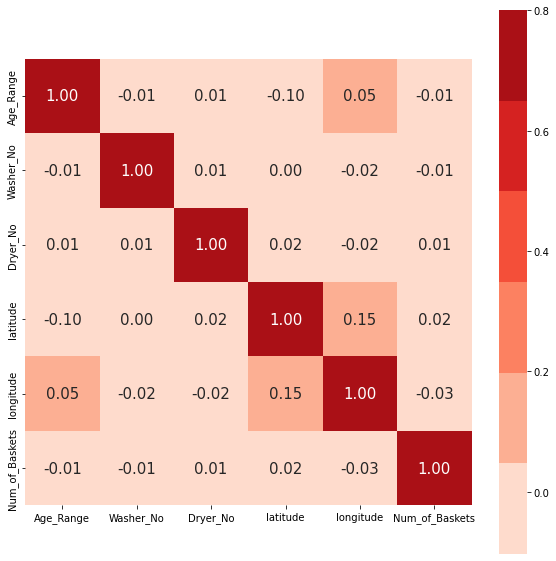

In [30]:
cor = new_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds"))

### Binning for Age Range

In [31]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
new_df1['Binned_Age_Range'] = pd.cut(new_df1['Age_Range'], bins)
new_df1

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets,Binned_Age_Range
0,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,...,black,short,clothes,3,10,no,2.912316,101.657948,1.0,"(20, 30]"
1,19/10/2015,20:28:42,malay,male,thin,32.0,no,no_kids,big,white,...,blue_jeans,long,clothes,6,9,no,2.922506,101.643129,3.0,"(30, 40]"
2,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,...,black,long,clothes,4,10,no,2.935533,101.737170,1.0,"(20, 30]"
3,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,big,black,...,yellow,short,clothes,5,9,no,2.949924,101.637069,1.0,"(50, 60]"
4,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,...,white,long,clothes,3,9,no,2.903530,101.661249,3.0,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2016-01-24,21:45:06,foreigner,male,moderate,30.0,yes,no_kids,small,yellow,...,white,long,blankets,6,7,yes,3.082212,101.644878,2.0,"(20, 30]"
3996,2015-12-26,01:48:15,malay,male,moderate,24.0,yes,baby,small,green,...,black,short,clothes,4,10,yes,3.118138,101.677315,3.0,"(20, 30]"
3997,2015-12-07,01:42:32,foreigner,male,thin,27.0,yes,no_kids,small,blue,...,green,short,clothes,4,9,no,3.101051,101.643060,1.0,"(20, 30]"
3998,2016-02-10,00:24:23,indian,female,thin,18.0,yes,baby,big,black,...,blue,long,blankets,6,10,no,3.136530,101.699091,1.0,"(10, 20]"


<AxesSubplot:ylabel='Frequency'>

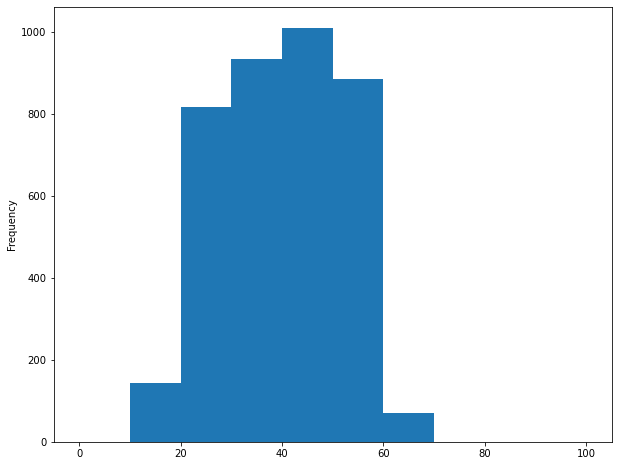

In [32]:
new_df1['Age_Range'].plot(kind="hist", bins = bins, figsize=(10,8))

In [33]:
new_df1 = new_df1.drop("Age_Range", 1)
new_df1

,Date,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,...,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets,Binned_Age_Range
0,19/10/2015,20:17:50,malay,male,moderate,yes,young,big,red,casual,...,black,short,clothes,3,10,no,2.912316,101.657948,1.0,"(20, 30]"
1,19/10/2015,20:28:42,malay,male,thin,no,no_kids,big,white,casual,...,blue_jeans,long,clothes,6,9,no,2.922506,101.643129,3.0,"(30, 40]"
2,19/10/2015,20:58:31,malay,female,moderate,no,no_kids,big,blue,casual,...,black,long,clothes,4,10,no,2.935533,101.737170,1.0,"(20, 30]"
3,19/10/2015,21:31:28,indian,male,thin,no,no_kids,big,black,casual,...,yellow,short,clothes,5,9,no,2.949924,101.637069,1.0,"(50, 60]"
4,19/10/2015,21:40:28,indian,male,moderate,no,no_kids,big,blue,casual,...,white,long,clothes,3,9,no,2.903530,101.661249,3.0,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2016-01-24,21:45:06,foreigner,male,moderate,yes,no_kids,small,yellow,traditional,...,white,long,blankets,6,7,yes,3.082212,101.644878,2.0,"(20, 30]"
3996,2015-12-26,01:48:15,malay,male,moderate,yes,baby,small,green,formal,...,black,short,clothes,4,10,yes,3.118138,101.677315,3.0,"(20, 30]"
3997,2015-12-07,01:42:32,foreigner,male,thin,yes,no_kids,small,blue,casual,...,green,short,clothes,4,9,no,3.101051,101.643060,1.0,"(20, 30]"
3998,2016-02-10,00:24:23,indian,female,thin,yes,baby,big,black,traditional,...,blue,long,blankets,6,10,no,3.136530,101.699091,1.0,"(10, 20]"


### Label Encode and Prepare X, y

In [34]:
new_df = new_df.apply(LabelEncoder().fit_transform)
new_df

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets
0,7,2835,3,1,1,10,1,4,0,8,...,1,0,1,1,0,3,0,91,1939,0
1,7,2861,3,1,2,14,0,1,0,9,...,1,5,0,1,3,2,0,210,1582,2
2,7,2946,3,0,1,12,0,1,0,1,...,1,0,0,1,1,3,0,353,3350,0
3,7,3024,2,1,2,33,0,1,0,0,...,1,14,1,1,2,2,0,496,1466,0
4,7,3042,2,1,1,16,0,1,0,1,...,1,13,0,1,0,2,0,3,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,63,3051,1,1,1,12,1,1,1,10,...,1,13,0,0,3,0,1,1799,1626,1
3996,34,214,3,1,1,6,1,0,1,3,...,0,1,1,1,1,3,1,2676,2294,2
3997,15,203,1,1,2,9,1,1,1,1,...,0,7,1,1,1,2,0,2297,1579,0
3998,80,52,2,0,2,0,1,0,0,0,...,1,4,0,0,3,3,0,3127,2660,0


In [35]:
y = new_df.Num_of_Baskets
X = new_df.drop("Num_of_Baskets", 1)
colnames = X.columns

In [36]:
new_df1 = new_df1.apply(LabelEncoder().fit_transform)
new_df1

,Date,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,...,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets,Binned_Age_Range
0,7,2865,3,1,1,1,4,0,8,0,...,0,1,1,0,3,0,89,1941,0,1
1,7,2891,3,1,2,0,1,0,9,0,...,5,0,1,3,2,0,205,1581,2,2
2,7,2975,3,0,1,0,1,0,1,0,...,0,0,1,1,3,0,361,3371,0,1
3,7,3051,2,1,2,0,1,0,0,0,...,14,1,1,2,2,0,506,1466,0,4
4,7,3068,2,1,1,0,1,0,1,0,...,13,0,1,0,2,0,3,2014,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,63,3077,1,1,1,1,1,1,10,2,...,13,0,0,3,0,1,1816,1627,1,1
3996,34,217,3,1,1,1,0,1,3,1,...,1,1,1,1,3,1,2708,2290,2,1
3997,15,207,1,1,2,1,1,1,1,0,...,7,1,1,1,2,0,2323,1578,0,1
3998,80,55,2,0,2,1,0,0,0,2,...,4,0,0,3,3,0,3162,2671,0,0


In [37]:
y1 = new_df1.Binned_Age_Range
X1 = new_df1.drop("Binned_Age_Range", 1)
colnames = X1.columns

In [38]:
new_df2 = new_df2.apply(LabelEncoder().fit_transform)
new_df2

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets
0,7,2865,3,1,1,10,1,4,0,8,...,1,0,1,1,0,3,0,89,1941,0
1,7,2891,3,1,2,14,0,1,0,9,...,1,5,0,1,3,2,0,205,1581,2
2,7,2975,3,0,1,12,0,1,0,1,...,1,0,0,1,1,3,0,361,3371,0
3,7,3051,2,1,2,33,0,1,0,0,...,1,14,1,1,2,2,0,506,1466,0
4,7,3068,2,1,1,16,0,1,0,1,...,1,13,0,1,0,2,0,3,2014,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,63,3077,1,1,1,12,1,1,1,10,...,1,13,0,0,3,0,1,1816,1627,1
3996,34,217,3,1,1,6,1,0,1,3,...,0,1,1,1,1,3,1,2708,2290,2
3997,15,207,1,1,2,9,1,1,1,1,...,0,7,1,1,1,2,0,2323,1578,0
3998,80,55,2,0,2,0,1,0,0,0,...,1,4,0,0,3,3,0,3162,2671,0


In [39]:
y2 = new_df2.Age_Range
X2 = new_df2.drop("Age_Range", 1)
colnames = X2.columns

### Feature Selection

In [40]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [41]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5)

feat_selector = BorutaPy(rf, n_estimators="auto", random_state=1)

In [42]:
feat_selector.fit(X.values, y.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=28, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x25A0A537440),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x25A0A537440)

In [43]:
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

In [44]:
print('---------Top 10----------')
display(boruta_score.head(10))

print('---------Bottom 10----------')
boruta_score.tail(10)

---------Top 10----------


,Features,Score
20,Num_of_Baskets,1.00
19,longitude,0.95
1,Time,0.90
0,Date,0.85
5,With_Kids,0.80
9,Attire,0.75
13,pants_type,0.70
11,shirt_type,0.65
2,Race,0.60
7,Basket_Size,0.55


---------Bottom 10----------


,Features,Score
16,Dryer_No,0.45
14,Wash_Item,0.40
4,Body_Size,0.35
10,Shirt_Colour,0.30
12,Pants_Colour,0.25
15,Washer_No,0.15
3,Gender,0.15
18,latitude,0.15
8,Basket_colour,0.05
6,Kids_Category,0.00


Text(0.5, 1.0, 'Boruta Top 10 Features')

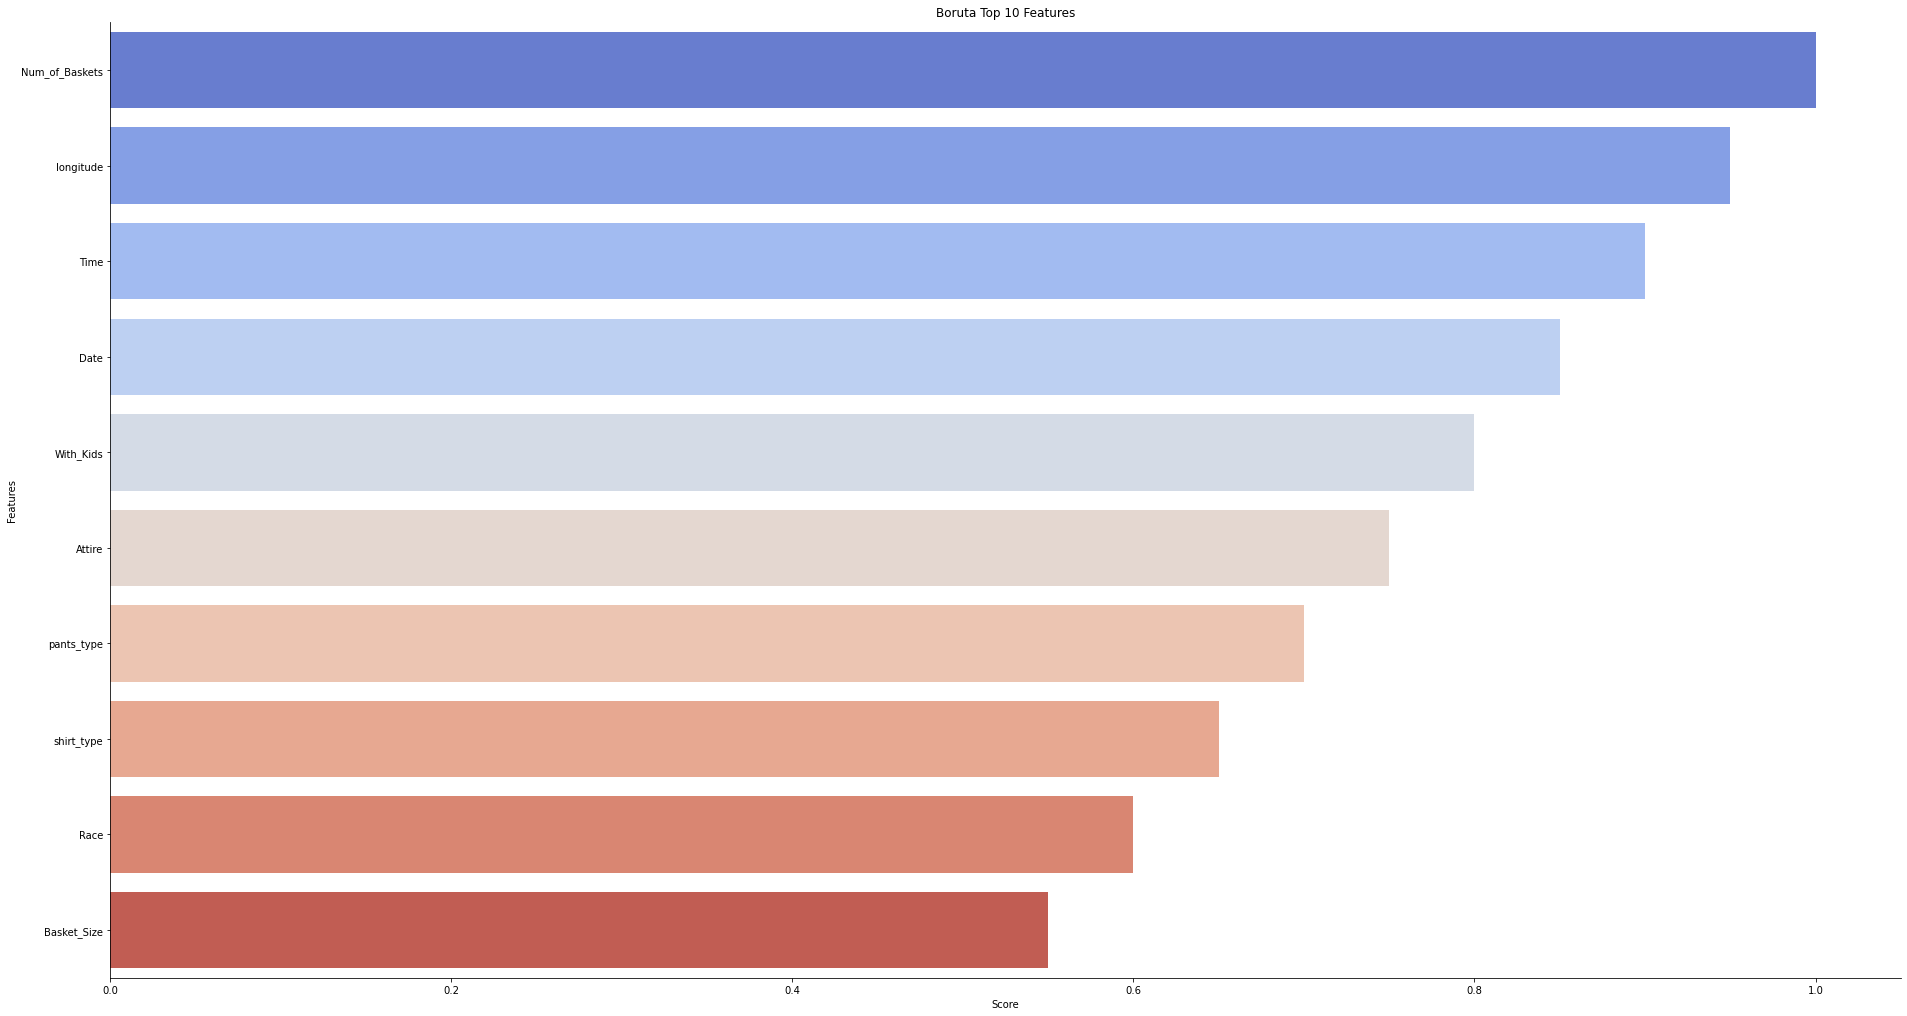

In [45]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[:10], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta Top 10 Features")

In [46]:
feat_selector.fit(X1.values, y1.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=56, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x25A0A537440),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x25A0A537440)

In [47]:
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

In [48]:
print('---------Top 10----------')
display(boruta_score.head(10))

print('---------Bottom 10----------')
boruta_score.tail(10)

---------Top 10----------


,Features,Score
0,Date,1.00
18,latitude,1.00
1,Time,0.95
19,longitude,0.89
12,Pants_Colour,0.84
8,Basket_colour,0.79
6,Kids_Category,0.74
10,Shirt_Colour,0.68
9,Attire,0.63
14,Wash_Item,0.58


---------Bottom 10----------


,Features,Score
16,Dryer_No,0.47
15,Washer_No,0.42
4,Body_Size,0.37
20,Num_of_Baskets,0.32
7,Basket_Size,0.26
5,With_Kids,0.21
13,pants_type,0.16
11,shirt_type,0.11
17,Spectacles,0.11
3,Gender,0.00


Text(0.5, 1.0, 'Boruta Top 10 Features')

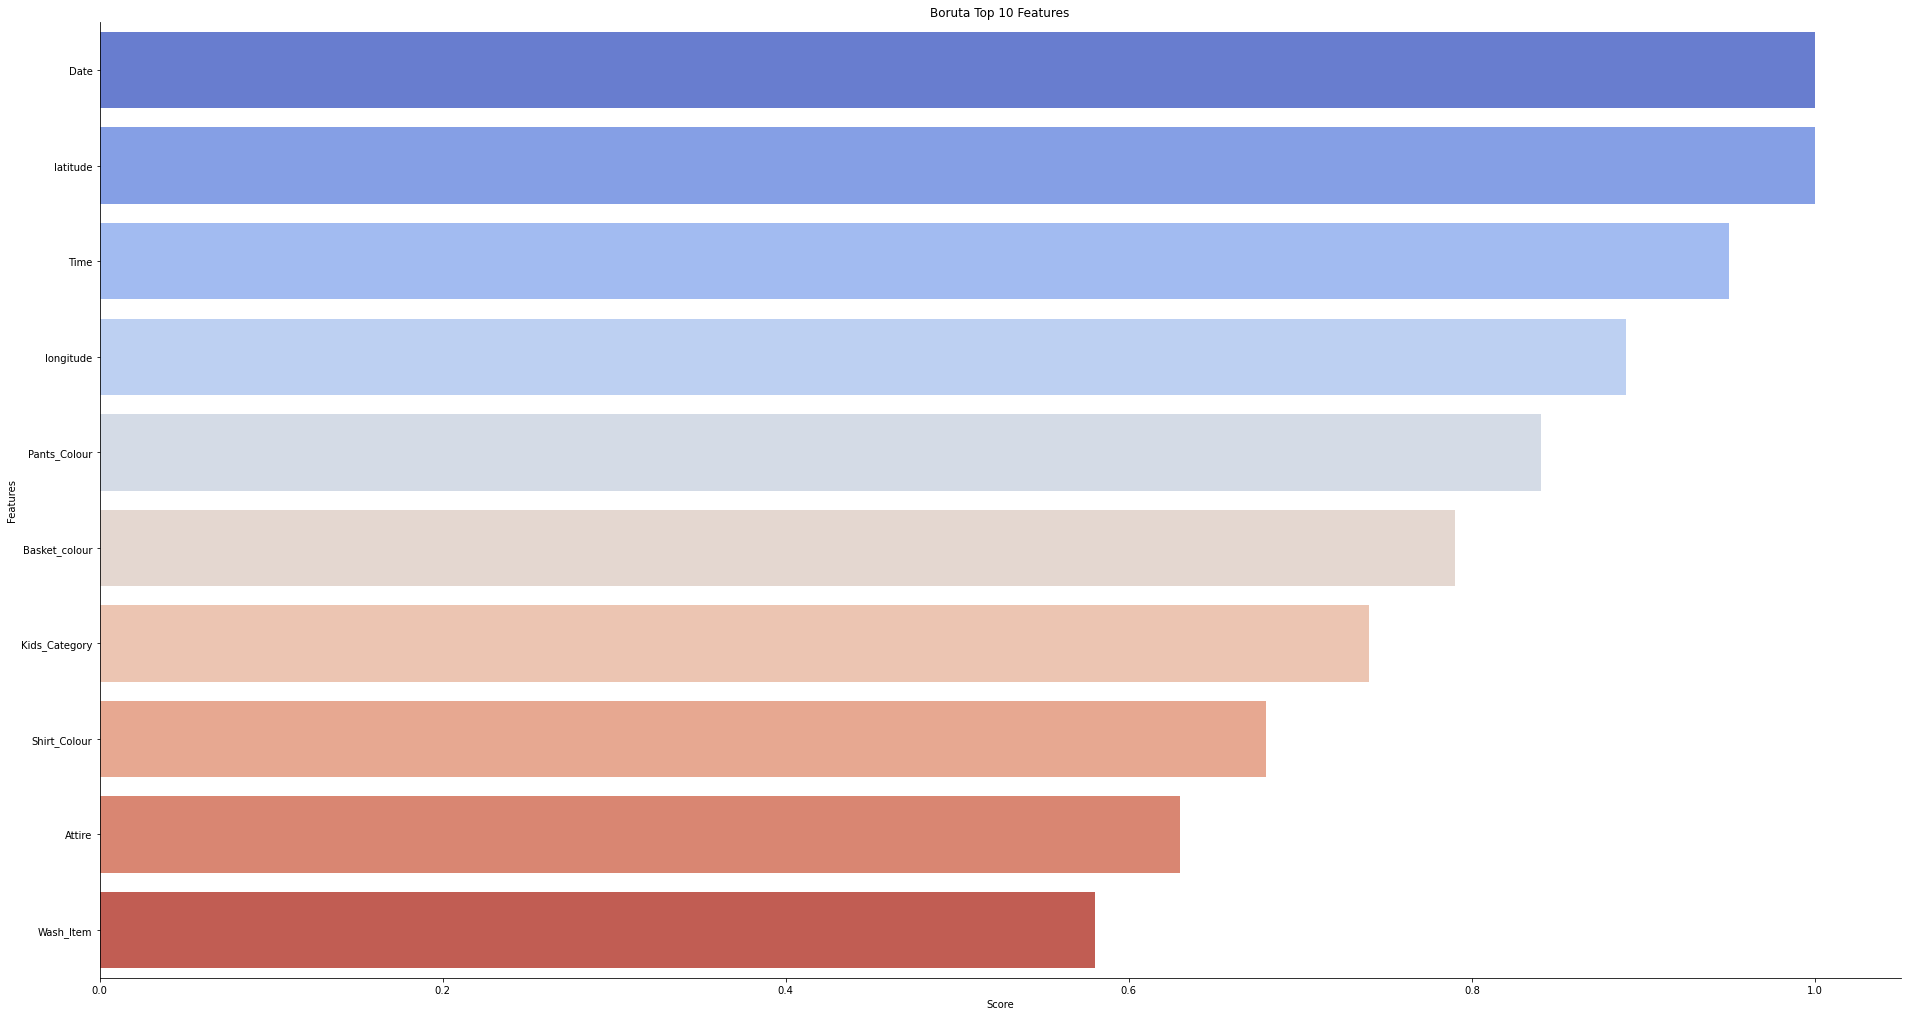

In [49]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[:10], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta Top 10 Features")

### Classification for Number_of_Bucket

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10) 

In [51]:
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on test set: {:.3f}".format(nb.score(X_train, y_train)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_NB = nb.predict_proba(X_test)
#prob_NB = prob_NB[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=nb.predict(X_test))
print(sk_report)

Accuracy on test set: 0.371
Mjority classifier Confusion Matrix
 [[ 77  78  93]
 [ 88  78  85]
 [ 84  79 102]]
              precision    recall  f1-score   support

           0   0.309237  0.310484  0.309859       248
           1   0.331915  0.310757  0.320988       251
           2   0.364286  0.384906  0.374312       265

    accuracy                       0.336387       764
   macro avg   0.335146  0.335382  0.335053       764
weighted avg   0.335782  0.336387  0.335871       764



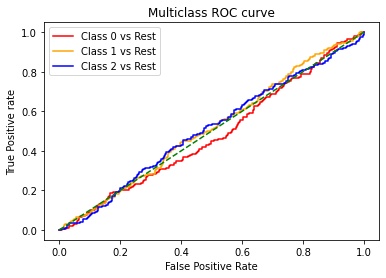

In [52]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df['Num_of_Baskets'].nunique()

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_NB[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [53]:
rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_RF = rf.predict_proba(X_test)
#prob_RF = prob_RF[:, 1]

Accuracy on training set: 0.668
Mjority classifier Confusion Matrix
 [[101  79  68]
 [107  71  73]
 [101  90  74]]


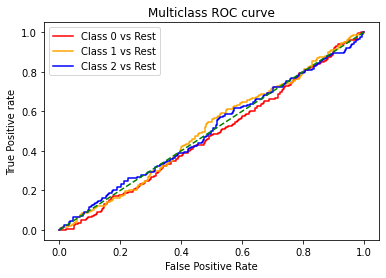

In [54]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df['Num_of_Baskets'].nunique()

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_RF[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [55]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(KNN.score(X_train, y_train)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_KNN = KNN.predict_proba(X_test)
#prob_KNN = prob_KNN[:, 1]

Accuracy on training set: 0.649
Mjority classifier Confusion Matrix
 [[117  59  72]
 [116  73  62]
 [126  70  69]]


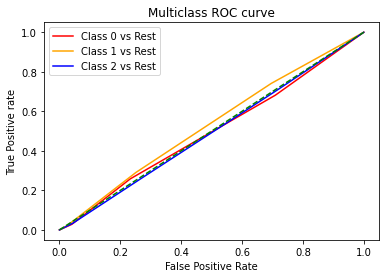

In [56]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df['Num_of_Baskets'].nunique()

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_KNN[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

### SMOTE

In [57]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.4, random_state=10)
columns = X_train.columns
os_data_X, os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['Num_of_Baskets'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of 1 in oversampled data",len(os_data_y[os_data_y['Num_of_Baskets']==0]))
print("Number of 2",len(os_data_y[os_data_y['Num_of_Baskets']==1]))
print("Number of 3",len(os_data_y[os_data_y['Num_of_Baskets']==2]))
print("Proportion of 1 data in oversampled data is ",len(os_data_y[os_data_y['Num_of_Baskets']==0])/len(os_data_X))
print("Proportion of 2 data in oversampled data is ",len(os_data_y[os_data_y['Num_of_Baskets']==1])/len(os_data_X))
print("Proportion of 3 data in oversampled data is ",len(os_data_y[os_data_y['Num_of_Baskets']==2])/len(os_data_X))

length of oversampled data is  2322
Number of 1 in oversampled data 774
Number of 2 774
Number of 3 774
Proportion of 1 data in oversampled data is  0.3333333333333333
Proportion of 2 data in oversampled data is  0.3333333333333333
Proportion of 3 data in oversampled data is  0.3333333333333333


In [58]:
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.4, random_state=10)

In [59]:
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on test set: {:.3f}".format(nb.score(X_train, y_train)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_NB = nb.predict_proba(X_test)
#prob_NB = prob_NB[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=nb.predict(X_test))
print(sk_report)

Accuracy on test set: 0.399
Mjority classifier Confusion Matrix
 [[114  97  98]
 [104 106  90]
 [114 105 101]]
              precision    recall  f1-score   support

           0   0.343373  0.368932  0.355694       309
           1   0.344156  0.353333  0.348684       300
           2   0.349481  0.315625  0.331691       320

    accuracy                       0.345533       929
   macro avg   0.345670  0.345963  0.345357       929
weighted avg   0.345730  0.345533  0.345163       929



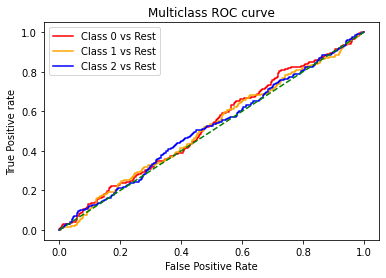

In [60]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df['Num_of_Baskets'].nunique()

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_NB[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [61]:
rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_RF = rf.predict_proba(X_test)
#prob_RF = prob_RF[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=rf.predict(X_test))
print(sk_report)

Accuracy on training set: 0.769
Mjority classifier Confusion Matrix
 [[118 102  89]
 [ 95 120  85]
 [ 93 141  86]]
              precision    recall  f1-score   support

           0   0.385621  0.381877  0.383740       309
           1   0.330579  0.400000  0.361991       300
           2   0.330769  0.268750  0.296552       320

    accuracy                       0.348762       929
   macro avg   0.348990  0.350209  0.347428       929
weighted avg   0.348952  0.348762  0.346684       929



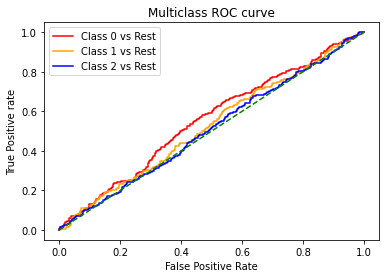

In [62]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df['Num_of_Baskets'].nunique()

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_RF[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [63]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(KNN.score(X_train, y_train)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_KNN = KNN.predict_proba(X_test)
#prob_KNN = prob_KNN[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=KNN.predict(X_test))
print(sk_report)

Accuracy on training set: 0.650
Mjority classifier Confusion Matrix
 [[156  84  69]
 [155  86  59]
 [157  75  88]]
              precision    recall  f1-score   support

           0   0.333333  0.504854  0.401544       309
           1   0.351020  0.286667  0.315596       300
           2   0.407407  0.275000  0.328358       320

    accuracy                       0.355221       929
   macro avg   0.363920  0.355507  0.348500       929
weighted avg   0.364560  0.355221  0.348580       929



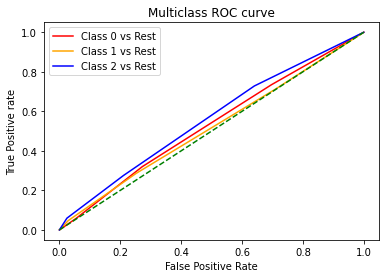

In [64]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df['Num_of_Baskets'].nunique()

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_KNN[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

### Classification for Age_Range

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 10) 

In [66]:
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on test set: {:.3f}".format(nb.score(X_train, y_train)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_NB = nb.predict_proba(X_test)
#prob_NB = prob_NB[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=nb.predict(X_test))
print(sk_report)

Accuracy on test set: 0.294
Mjority classifier Confusion Matrix
 [[ 0 15  5 13  5]
 [ 0 93 15 43 20]
 [ 0 78 27 78 11]
 [ 0 88 33 67 14]
 [ 0 80 24 47 16]]
              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000        38
           1   0.262712  0.543860  0.354286       171
           2   0.259615  0.139175  0.181208       194
           3   0.270161  0.331683  0.297778       202
           4   0.242424  0.095808  0.137339       167

    accuracy                       0.262953       772
   macro avg   0.206983  0.222105  0.194122       772
weighted avg   0.246563  0.262953  0.231637       772



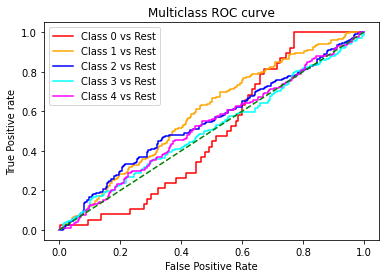

In [67]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df1['Binned_Age_Range'].nunique()

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_NB[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], color='cyan', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], color='magenta', label='Class 4 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [68]:
rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_RF = rf.predict_proba(X_test)
#prob_RF = prob_RF[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=rf.predict(X_test))
print(sk_report)

Accuracy on training set: 0.500
Mjority classifier Confusion Matrix
 [[  0  14   3  20   1]
 [  0  72   9  83   7]
 [  0  70   9 111   4]
 [  0  79   9 103  11]
 [  0  70  12  74  11]]
              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000        38
           1   0.236066  0.421053  0.302521       171
           2   0.214286  0.046392  0.076271       194
           3   0.263427  0.509901  0.347386       202
           4   0.323529  0.065868  0.109453       167

    accuracy                       0.252591       772
   macro avg   0.207462  0.208643  0.167126       772
weighted avg   0.245052  0.252591  0.200749       772



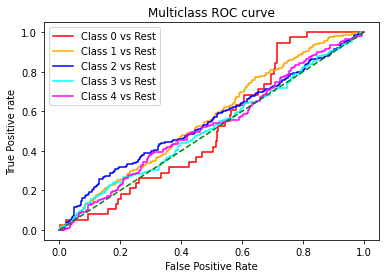

In [69]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df1['Binned_Age_Range'].nunique()

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_RF[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], color='cyan', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], color='magenta', label='Class 4 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [70]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(KNN.score(X_train, y_train)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_KNN = KNN.predict_proba(X_test)
#prob_KNN = prob_KNN[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=KNN.predict(X_test))
print(sk_report)

Accuracy on training set: 0.550
Mjority classifier Confusion Matrix
 [[ 6 14  8  3  7]
 [23 60 33 31 24]
 [20 60 42 47 25]
 [24 68 50 38 22]
 [22 58 37 27 23]]
              precision    recall  f1-score   support

           0   0.063158  0.157895  0.090226        38
           1   0.230769  0.350877  0.278422       171
           2   0.247059  0.216495  0.230769       194
           3   0.260274  0.188119  0.218391       202
           4   0.227723  0.137725  0.171642       167

    accuracy                       0.218912       772
   macro avg   0.205797  0.210222  0.197890       772
weighted avg   0.233674  0.218912  0.218377       772



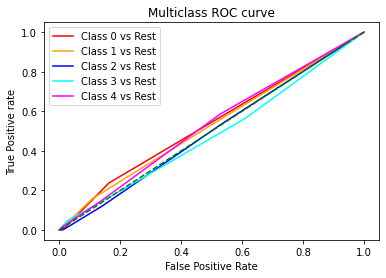

In [71]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df1['Binned_Age_Range'].nunique()

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_KNN[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], color='cyan', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], color='magenta', label='Class 4 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

### SMOTE

In [72]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X1, y1.values.ravel(), test_size=0.4, random_state=10)
columns = X_train.columns
os_data_X, os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['Binned_Age_Range'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of 0 in oversampled data",len(os_data_y[os_data_y['Binned_Age_Range']==0]))
print("Number of 1",len(os_data_y[os_data_y['Binned_Age_Range']==1]))
print("Number of 2",len(os_data_y[os_data_y['Binned_Age_Range']==2]))
print("Number of 3",len(os_data_y[os_data_y['Binned_Age_Range']==3]))
print("Number of 4",len(os_data_y[os_data_y['Binned_Age_Range']==4]))
print("Proportion of 0 data in oversampled data is ",len(os_data_y[os_data_y['Binned_Age_Range']==0])/len(os_data_X))
print("Proportion of 1 data in oversampled data is ",len(os_data_y[os_data_y['Binned_Age_Range']==1])/len(os_data_X))
print("Proportion of 2 data in oversampled data is ",len(os_data_y[os_data_y['Binned_Age_Range']==2])/len(os_data_X))
print("Proportion of 3 data in oversampled data is ",len(os_data_y[os_data_y['Binned_Age_Range']==3])/len(os_data_X))
print("Proportion of 4 data in oversampled data is ",len(os_data_y[os_data_y['Binned_Age_Range']==4])/len(os_data_X))

length of oversampled data is  3095
Number of 0 in oversampled data 619
Number of 1 619
Number of 2 619
Number of 3 619
Number of 4 619
Proportion of 0 data in oversampled data is  0.2
Proportion of 1 data in oversampled data is  0.2
Proportion of 2 data in oversampled data is  0.2
Proportion of 3 data in oversampled data is  0.2
Proportion of 4 data in oversampled data is  0.2


In [73]:
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.4, random_state=10)

In [74]:
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on test set: {:.3f}".format(nb.score(X_train, y_train)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_NB = nb.predict_proba(X_test)
#prob_NB = prob_NB[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=nb.predict(X_test))
print(sk_report)

auc_NB = roc_auc_score(y_test, prob_NB, multi_class='ovr')
print('AUC: %.2f' % auc_NB)

Accuracy on test set: 0.361
Mjority classifier Confusion Matrix
 [[161  48  13  16  22]
 [ 57  73  26  54  25]
 [ 36  82  47  69  24]
 [ 26  70  40  83  34]
 [ 53  65  31  58  25]]
              precision    recall  f1-score   support

           0   0.483483  0.619231  0.543002       260
           1   0.215976  0.310638  0.254799       235
           2   0.299363  0.182171  0.226506       258
           3   0.296429  0.328063  0.311445       253
           4   0.192308  0.107759  0.138122       232

    accuracy                       0.314216      1238
   macro avg   0.297512  0.309572  0.294775      1238
weighted avg   0.301541  0.314216  0.299141      1238

AUC: 0.64


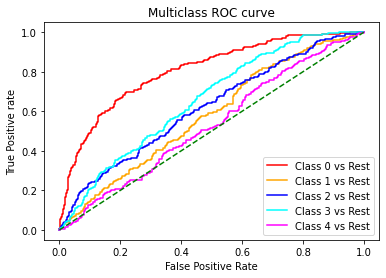

In [75]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df1['Binned_Age_Range'].nunique()

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_NB[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], color='cyan', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], color='magenta', label='Class 4 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [76]:
rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_RF = rf.predict_proba(X_test)
#prob_RF = prob_RF[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=rf.predict(X_test))
print(sk_report)

Accuracy on training set: 0.565
Mjority classifier Confusion Matrix
 [[183  62   1   5   9]
 [ 72 105  14  24  20]
 [ 47  95  26  60  30]
 [ 39  88  29  66  31]
 [ 68  87  20  28  29]]
              precision    recall  f1-score   support

           0   0.447433  0.703846  0.547085       260
           1   0.240275  0.446809  0.312500       235
           2   0.288889  0.100775  0.149425       258
           3   0.360656  0.260870  0.302752       253
           4   0.243697  0.125000  0.165242       232

    accuracy                       0.330372      1238
   macro avg   0.316190  0.327460  0.295401      1238
weighted avg   0.319155  0.330372  0.298194      1238



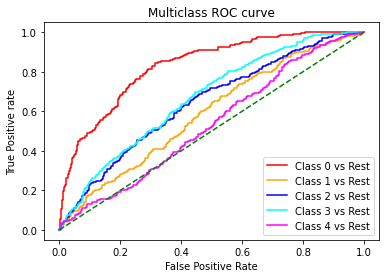

In [77]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df1['Binned_Age_Range'].nunique()

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_RF[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], color='cyan', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], color='magenta', label='Class 4 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [78]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(KNN.score(X_train, y_train)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_KNN = KNN.predict_proba(X_test)
#prob_KNN = prob_KNN[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=KNN.predict(X_test))
print(sk_report)

Accuracy on training set: 0.634
Mjority classifier Confusion Matrix
 [[207  25   9   7  12]
 [ 56  94  26  33  26]
 [ 42  75  65  44  32]
 [ 57  78  46  45  27]
 [ 58  58  34  24  58]]
              precision    recall  f1-score   support

           0   0.492857  0.796154  0.608824       260
           1   0.284848  0.400000  0.332743       235
           2   0.361111  0.251938  0.296804       258
           3   0.294118  0.177866  0.221675       253
           4   0.374194  0.250000  0.299742       232

    accuracy                       0.378837      1238
   macro avg   0.361426  0.375191  0.351957      1238
weighted avg   0.363064  0.378837  0.354352      1238



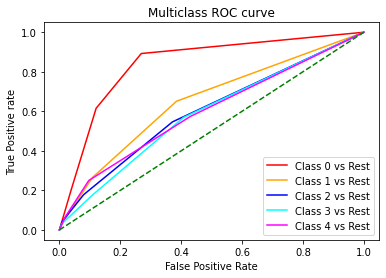

In [79]:
fpr = {}
tpr = {}
thresh ={}
n_class = new_df1['Binned_Age_Range'].nunique()

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_KNN[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], color='cyan', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], color='magenta', label='Class 4 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

### Regression for Age Range

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 10) 

In [81]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
regressor = SVR(kernel = 'rbf')

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Accuracy on training set: {:.3f}".format(regressor.score(X_train, y_train)))

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

Accuracy on training set: 0.014
10.23561709468476
140.8668354505676


<AxesSubplot:xlabel='Age_Range'>

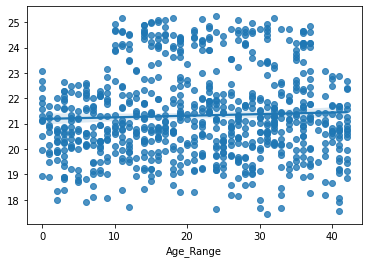

In [82]:
sns.regplot(y_test, y_pred, data=new_df1)

In [83]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from tensorflow.keras.utils import to_categorical
from iteration_utilities import deepflatten

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_ss = sc.fit_transform(X1)
print(X_ss)

[[-1.55728793  0.98348807  1.20270429 ... -1.6516679   0.01167574
  -1.15876856]
 [-1.55728793  1.00849906  1.20270429 ... -1.54748439 -0.3116524
   1.26628317]
 [-1.55728793  1.08930381  1.20270429 ... -1.40737553  1.29600695
  -1.15876856]
 ...
 [-1.31812491 -1.57340503 -0.5343601  ...  0.35476282 -0.3143468
  -1.15876856]
 [ 0.62507458 -1.71962314  0.3341721  ...  1.108297    0.66731335
  -1.15876856]
 [ 0.38591157 -0.55564999 -1.40289229 ...  0.87478224  0.7194051
  -1.15876856]]


In [85]:
y_one_hot = to_categorical(y1)
 
# Show the category label after one-hot encoding
print('Original label 0 : ', y1[0])
print('After conversion to categorical ( one-hot ) : ', y_one_hot[0])

Original label 0 :  1
After conversion to categorical ( one-hot ) :  [0. 1. 0. 0. 0.]


In [86]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 1281, 1: 1269, 2: 1268}

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X_ss, y_one_hot, test_size = 0.1, shuffle= True)

In [88]:
model = Sequential()
model.add(Dense(64, input_dim=21, activation='relu'))
model.add(Dense(8, activation = "relu"))
model.add(Dense(5, activation='softmax'))

In [89]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
 dense_2 (Dense)             (None, 5)                 45        
                                                                 
Total params: 1,973
Trainable params: 1,973
Non-trainable params: 0
_________________________________________________________________


In [91]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=200, batch_size=64)

Epoch 1/200
55/55 [==============================] - 1s 5ms/step - loss: 1.6182 - accuracy: 0.2184 - val_loss: 1.5554 - val_accuracy: 0.2850
Epoch 2/200
55/55 [==============================] - 0s 2ms/step - loss: 1.5813 - accuracy: 0.2256 - val_loss: 1.5400 - val_accuracy: 0.3135
Epoch 3/200
55/55 [==============================] - 0s 2ms/step - loss: 1.5613 - accuracy: 0.2423 - val_loss: 1.5314 - val_accuracy: 0.3109
Epoch 4/200
55/55 [==============================] - 0s 2ms/step - loss: 1.5481 - accuracy: 0.2530 - val_loss: 1.5258 - val_accuracy: 0.3083
Epoch 5/200
55/55 [==============================] - 0s 2ms/step - loss: 1.5385 - accuracy: 0.2581 - val_loss: 1.5214 - val_accuracy: 0.2927
Epoch 6/200
55/55 [==============================] - 0s 2ms/step - loss: 1.5314 - accuracy: 0.2636 - val_loss: 1.5181 - val_accuracy: 0.2772
Epoch 7/200
55/55 [==============================] - 0s 2ms/step - loss: 1.5257 - accuracy: 0.2645 - val_loss: 1.5158 - val_accuracy: 0.2876
Epoch 8/200
5

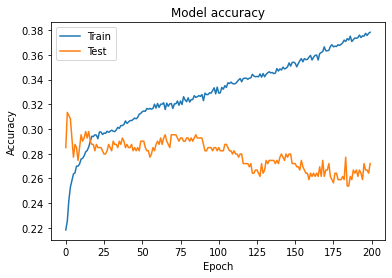

In [92]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

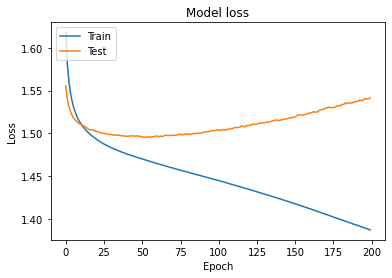

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()